<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Making-pretty-maps" data-toc-modified-id="Making-pretty-maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Making pretty maps</a></span><ul class="toc-item"><li><span><a href="#Layering-and-hue" data-toc-modified-id="Layering-and-hue-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Layering and hue</a></span></li><li><span><a href="#Adding-annotations" data-toc-modified-id="Adding-annotations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Adding annotations</a></span></li></ul></li></ul></div>

# Brief introduction to plotting maps and simple GIS (Geographic Information Systems)

## Intro

Sometimes it is useful to show information on a map. For the Pandas user the Geopandas 'extension' is the way to go. As it takes care of many complexities of GIS OOB.  There is a whole host of examples online but in many cases a world map or the New York Boroughs are not applicable to a project. Hence the Netherlands as example. As it turns out it is representative of the challenges in an average project.



## Import 

Import packages, install if needed. The manuals advise to use conda because it takes care to the (many) dependencies.


In [ ]:
#!conda install geopandas
#!conda install geopy

#!pip install geopandas
!#pip install geopy

In [271]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
%config InlineBackend.figure_format = 'retina'


## Load data

For maps typically a shapefile (.shp) is used. Google search with 'shapefile' will render the correct map or data in many cases. Typically the .shp file is in an directory with other files (.prj, . cpg, .bdf): download **all**. Although in GeoPandas only the .shp file is called, under the hood the other files may be needed, e.g. for projection data.

In practice, GeoPandas reads in almost *any* geographic file format, using a library called Fiona

In [2]:
# Create a data directory
shapedir='/Users/maartenk/Documents/git/Cookbooks/Sources/ShapeFiles/'

In [278]:
text = !ls /Users/maartenk/Documents/git/Cookbooks/Sources/ShapeFiles/
text[10:16]

['BAG-Woonplaatsgrenzen.qpj',
 'BAG-Woonplaatsgrenzen.shp',
 'BAG-Woonplaatsgrenzen.shx',
 'BAG-Woonplaatsgrenzen.txt',
 'CBS_PC4_2017_v1.cpg',
 'CBS_PC4_2017_v1.dbf']

In [11]:
# read files
file = 'BAG-Woonplaatsgrenzen.shp' 
fp = shapedir+file
# or
# fp = f'{shapedir}BAG-Woonplaatsgrenzen.shp'
#or
fp_ = shapedir+'nl_imergis_kustlijn_2018.shp'
fp__ = shapedir+'ESRI-PC4-2017R1.shp'

# create geopandas
map_df_woonplaats = gpd.read_file(fp)
map_df_kustlijn = gpd.read_file(fp_)
map_df_pc4 = gpd.read_file(fp__)

In [16]:
WoonKernen = shapedir+'Top10NL-Plaats_kern.shp'

map_df_woonkernen = gpd.read_file(WoonKernen)

In [19]:
provincies = shapedir+'2019_provinciegrenzen_watergrenzen.gpkg'

map_df_provincies = gpd.read_file(provincies)

In [30]:
roads = shapedir+'nwb-light.shp'

map_df_roads = gpd.read_file(roads)

In [62]:
rail = shapedir+'Top10NL_Spoorwegen.shp'

map_df_rail = gpd.read_file(rail)

What sets GeoPandas apart from 'ordinary' Pandas is the geometry column. This contains the information required for the plotting. POLYGON in the case below. In fact these may be any  Shapely geometric object. POINT and LINE will be the most common.

And since they are shapely objects, any operation from the shapely library may be performed on them. Distance between points, area's etc.

Plotting the dataframe Geopandas will automatically pick up the geometry column data and plot it.

(2906, 1)


geometry
0  POLYGON ((194752.765999999 583067.921999998, 1...
1  (POLYGON ((143412.807875 446039.3325, 143437.3...
2  POLYGON ((178608.440812498 565614.255687501, 1...
3  POLYGON ((236459.151000001 462939.798, 236545....
4  POLYGON ((76089.31974999981 402183.432250001, ...

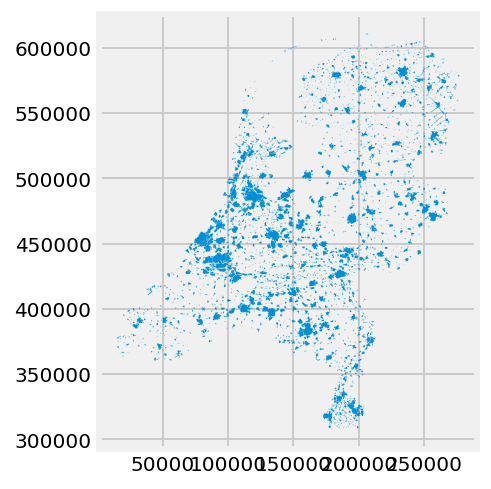

In [272]:
print(map_df_woonkernen.shape)
map_df_woonkernen.plot();
map_df_woonkernen.head()

(577, 5)


ROUTE ROUTE_CH  COUNT BEHEERDER  \
0   008    ##008      1         R   
1   010    ##010      1         R   
2   011    ##011      1         R   
3   013    ##013      1         R   
4   014    ##014      1         R   

                                            geometry  
0  LINESTRING (119963.732 492687.453, 120349.0445...  
1  LINESTRING (121893.377 492970.5425, 121981.238...  
2  LINESTRING (94683.8245000001 461740.591, 94730...  
3  LINESTRING (85382.00599999999 452781.718, 8527...  
4  LINESTRING (83975.507 458520.8865, 84048.36450...

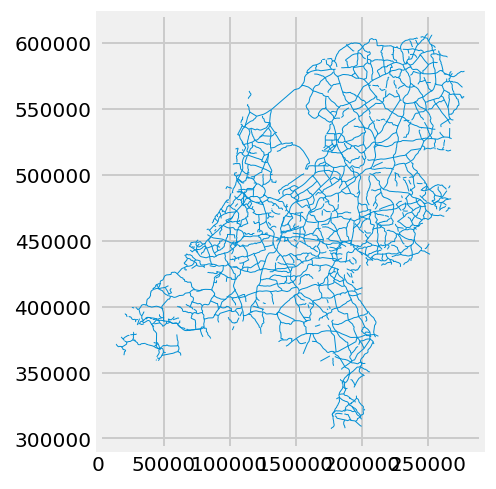

In [321]:
print(map_df_roads.shape)
map_df_roads.plot(lw=.5);
map_df_roads.head()

Normal Pandas commands, like masking, work.

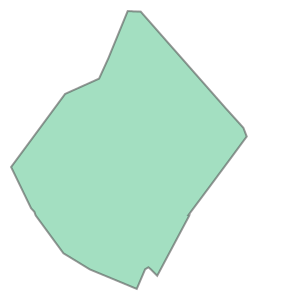

In [279]:
map_df_woonplaats.loc[5, 'geometry']

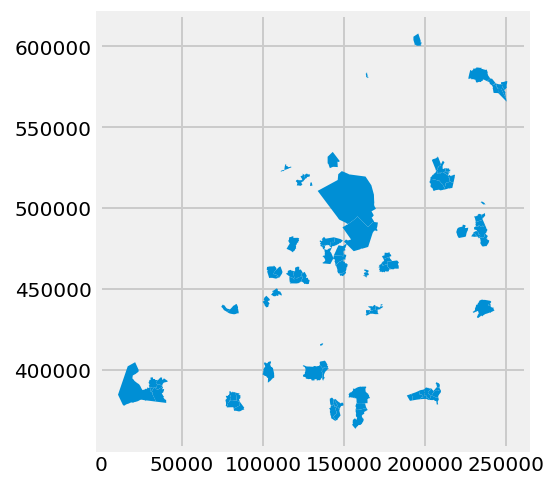

In [280]:
map_df_woonplaats.loc[0:100].plot();

All matplotlib ** kwargs work as well 

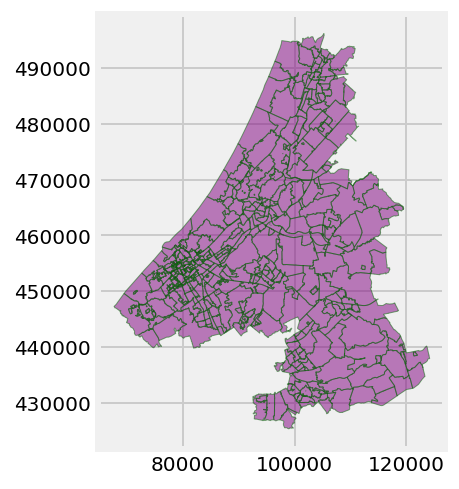

In [284]:
map_df_pc4.loc[(map_df_pc4['PC4'].astype(int) > 1999) & \
               (map_df_pc4['PC4'].astype(int) < 2999), ].plot\
            (facecolor='purple', edgecolor='darkgreen', alpha=.5)

In [55]:
map_df_pc4.dtypes

OBJECTID      float64
PC4            object
Aantal_mul      int64
Aantal_adr      int64
Shape_Leng    float64
Shape_Area    float64
geometry       object
dtype: object

In [296]:
map_df_provincies['provincienaam']

0         Groningen
1         Friesland
2           Drenthe
3        Overijssel
4        Gelderland
5           Utrecht
6     Noord-Holland
7      Zuid-Holland
8           Zeeland
9     Noord-Brabant
10          Limburg
11        Flevoland
Name: provincienaam, dtype: object

## Making pretty maps

Making maps that are value-add may not be as straight forward as it seems.

### Layering and hue

Shape files are in fact a collection of polygons that plotted, single or together, may represent something a human recognizes...as some geographic shape. Cmap will assign a color automatically. (the legend does not work yet) 

No handles with labels found to put in legend.


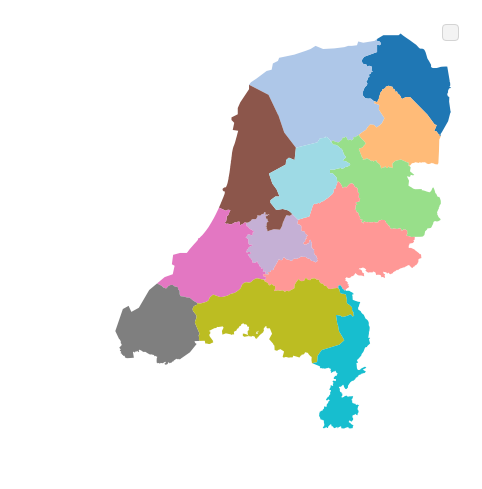

In [299]:
# NL provinces
ax=plt.axes()

ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax, label=map_df_provincies['provincienaam'])

plt.legend();


A 5th year pupil in a NL primary school will recognize this as NL but wonder where the inland lake is. This is where 'layering' comes in: plotting a set of polygons that represent the water. Plotting takes place in the top to bottom order. Very much like sending shapes in Powerpoint to the front or back

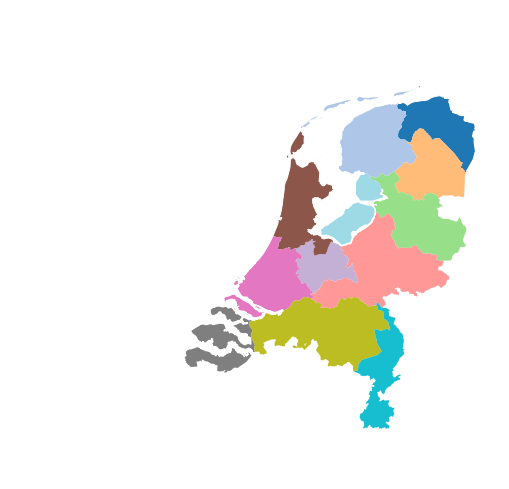

In [300]:
ax=plt.axes()
ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax)
#overlay water in white
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax);

This looks a lot better and will be recognized as the Netherlands. By layering a lot of other features may be added

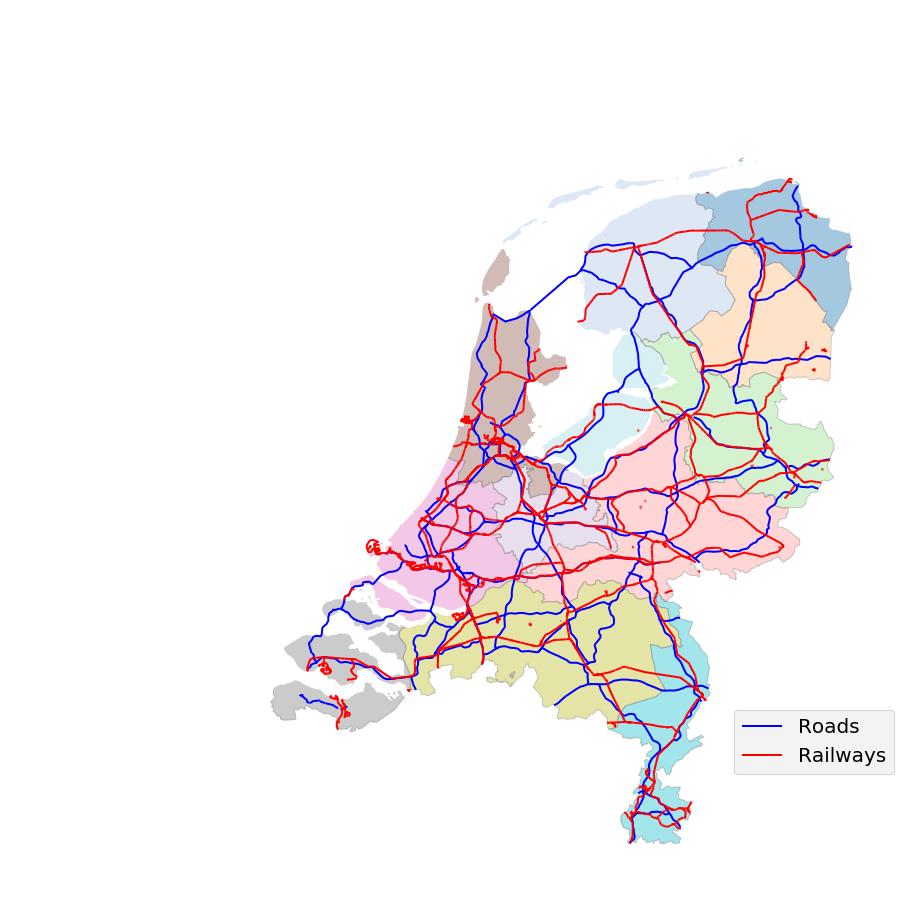

In [317]:
plt.figure(figsize=(8,8)) 
ax = plt.axes()
ax.axis('off')
# alpha makes it opaque
map_df_provincies.plot(cmap='tab20',ax=ax, facecolor='white', edgecolor='grey', alpha=.4)
# add major roads
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=1, color='blue', ax=ax, label='Roads')
# add rail rods
map_df_rail.loc[map_df_rail['typespoorb']=='trein'].plot(lw=1, color='r', ax=ax, label='Railways')
#Zorder=1 ensures it gets plotted as second layer (start @ 0)
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax, zorder=1)

plt.legend(bbox_to_anchor=(0.8, .2), loc=2, borderaxespad=0.);

As stated making a map may not be straight forward. This image gets convoluted very quickly.


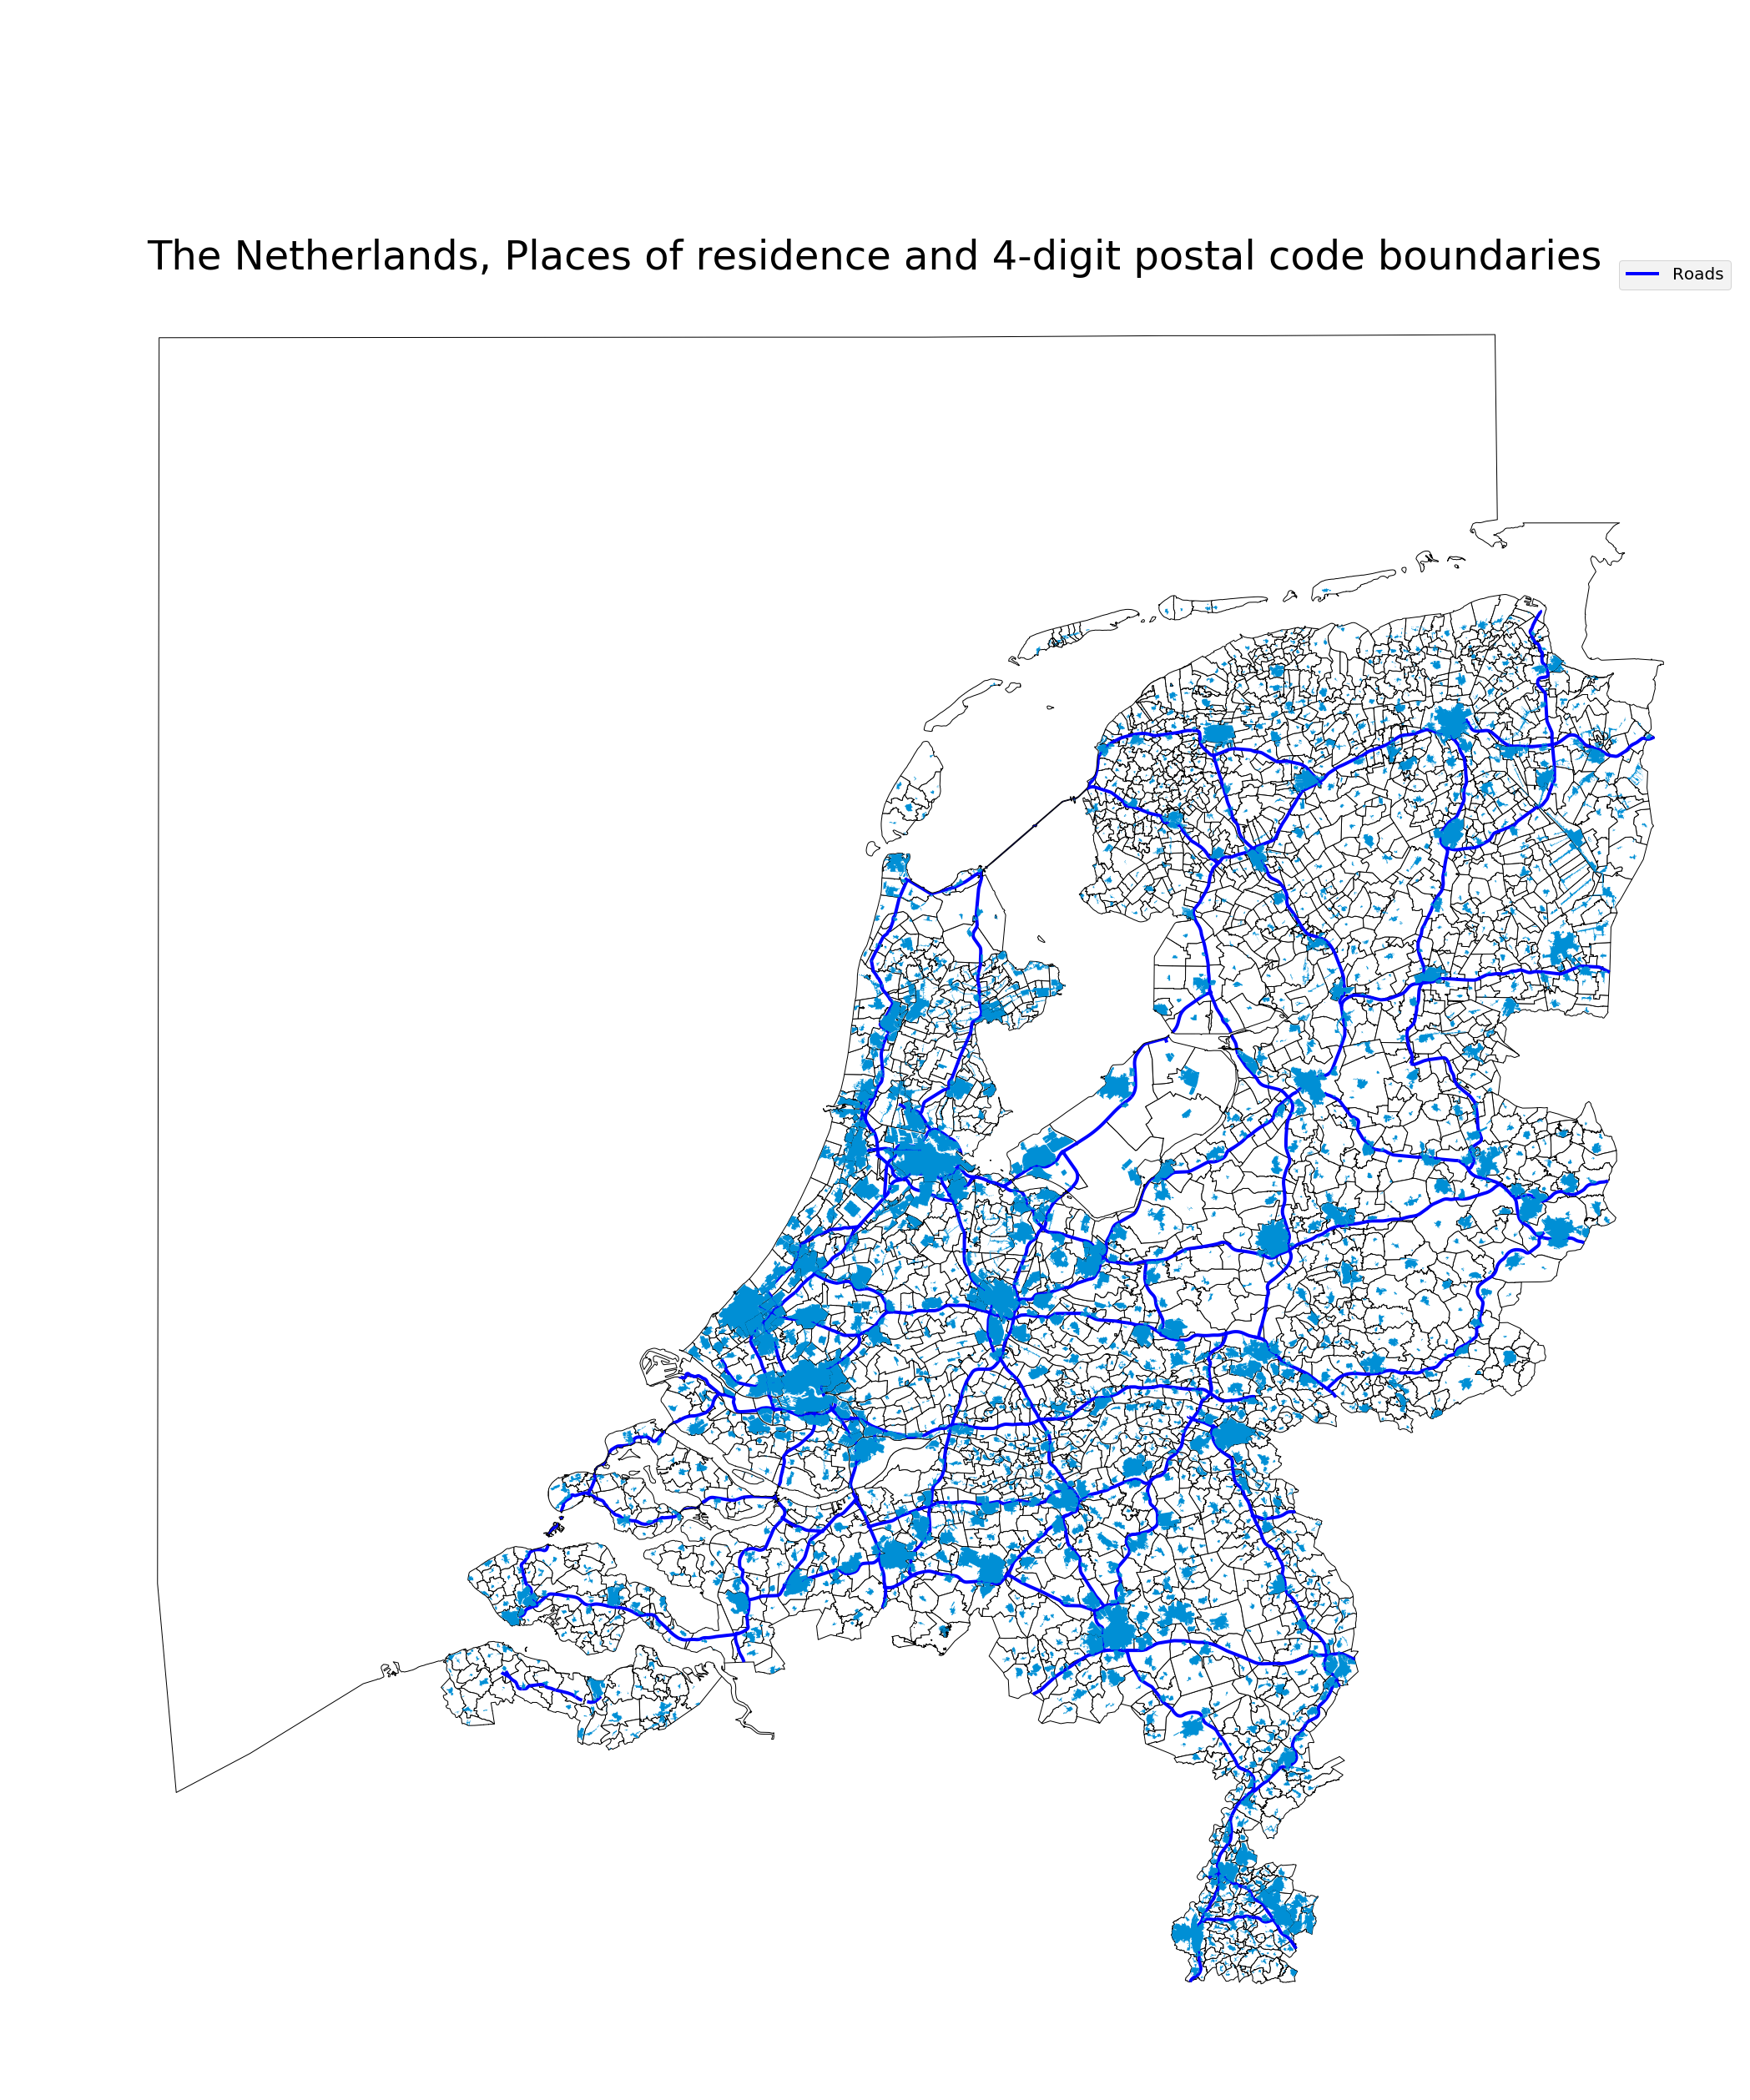

In [73]:
fig = plt.figure(figsize=(20,20))
ax = plt.axes()
ax.set_aspect('equal')
ax.set_axis_off()
# ax.axis('equal')
# ax.axis('off')
# map_df_provincies.plot(ax=ax, linewidth=1, edgecolor="black", facecolor='None',zorder=7)
map_df_kustlijn.plot(edgecolor='black', facecolor='white',ax=ax, zorder=3)
map_df_woonplaats.plot(facecolor='white', edgecolor='black', ax=ax, label='Built-up Area')
# map_df_pc4.plot(ax=ax, alpha=1, edgecolor='black', facecolor='None')
map_df_WoonKernen.plot(ax=ax,zorder=4, label='Built-up Area')
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=2, color='blue', ax=ax, label='Roads')

fig.suptitle("\n\n\n\n\nThe Netherlands, Places of residence and 4-digit postal code boundaries", fontsize=24)
plt.legend()
plt.show()

### Adding annotations

Maps often only get a meaning when textual pointers are added: annotations in Matplotlib terms.  
To achieve this Matplotlib requires to be told what(text) to put where(on the map). In the case of a shape it may not be obvious. Luckily shapely comes to rescue.

In [334]:
map_df_provincies['rep']= map_df_provincies['geometry'].representative_point()

map_df_provincies.sample(1, random_state=1)

id  gid code provincienaam  \
2   3    3   22       Drenthe   

                                            geometry  \
2  (POLYGON ((207869.464 536733.644, 207862.002 5...   

                                           rep  
2  POINT (242481.4149605625 547295.3285000001)

In [333]:
map_df_provincies_points = map_df_provincies.copy()
map_df_provincies_points.set_geometry('rep', inplace = True)
map_df_provincies_points.sample(1, random_state=1)

id  gid code provincienaam  \
2   3    3   22       Drenthe   

                                            geometry  \
2  (POLYGON ((207869.464 536733.644, 207862.002 5...   

                                           rep  
2  POINT (242481.4149605625 547295.3285000001)

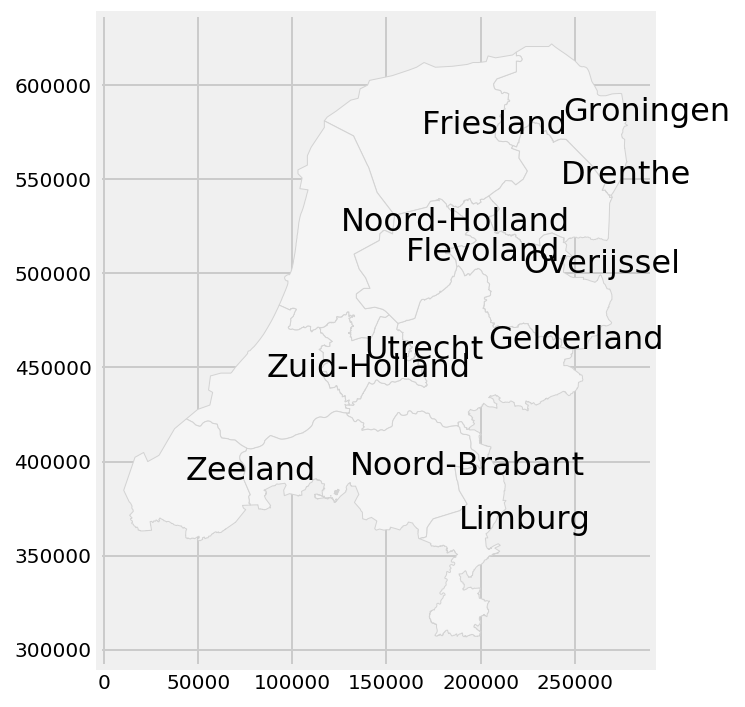

In [335]:
ax = map_df_provincies.plot(figsize = (6, 6), color = "whitesmoke", 
                            edgecolor = "lightgrey", linewidth = 0.5)

texts = []

for x, y, label in zip(map_df_provincies_points.geometry.x, 
                       map_df_provincies_points.geometry.y, 
                       map_df_provincies_points['provincienaam']):
                        texts.append(plt.text(x, y, label, fontsize = 16))

# import adjustText as aT
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

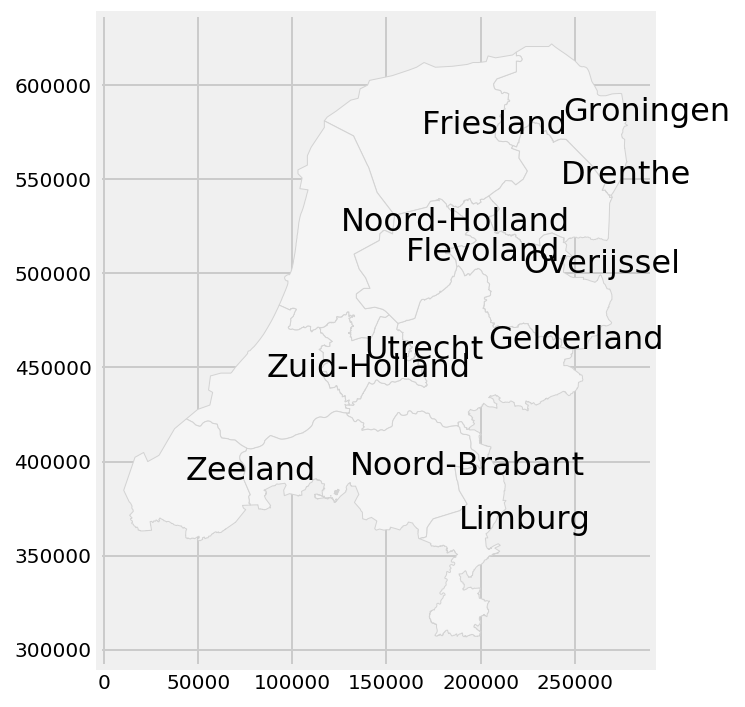

In [359]:
#together
map_df_provincies['rep']= map_df_provincies['geometry'].representative_point()
map_df_provincies_points = map_df_provincies.copy()
map_df_provincies_points.set_geometry('rep', inplace = True)

ax = map_df_provincies.plot(figsize = (6, 6), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)

texts = []

for x, y, label in zip(map_df_provincies_points.geometry.x, 
                       map_df_provincies_points.geometry.y, 
                       map_df_provincies_points['provincienaam']):
                        texts.append(plt.text(x, y, label, fontsize = 16))

# import adjustText as aT
# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

On a pretty map. This is actually very close to a primary school wall map

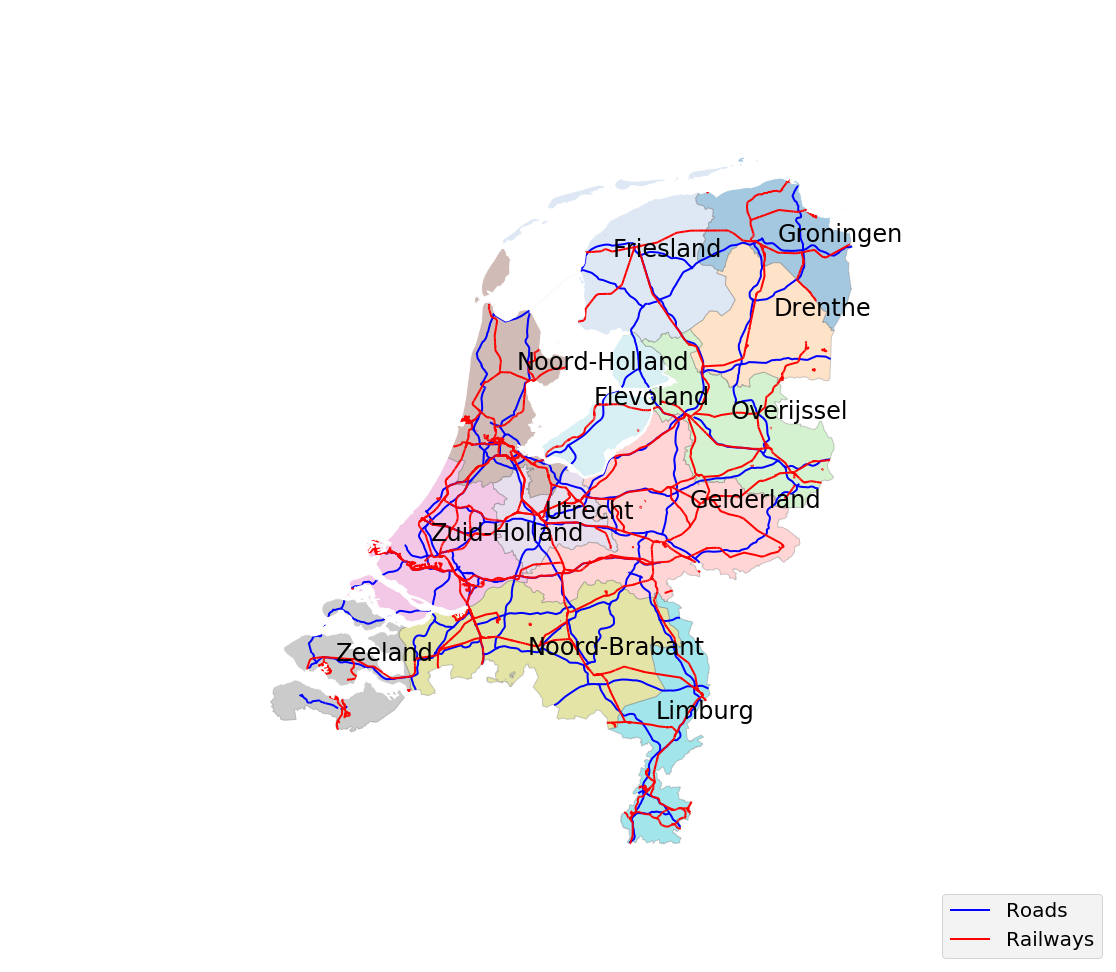

In [103]:
plt.figure(figsize=(8,8)) 
ax = plt.axes()
ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax, facecolor='white', edgecolor='grey', alpha=.4)
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax, zorder=3)
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=1, color='blue', ax=ax, label='Roads')
map_df_rail.loc[map_df_rail['typespoorb']=='trein'].plot(lw=1, color='r',ax=ax, label='Railways')
for x, y, label in zip(map_df_provincies_points.geometry.x, map_df_provincies_points.geometry.y, map_df_provincies_points['provincienaam']):
    texts.append(plt.text(x, y, label, fontsize = 12, weight='medium'))
plt.legend(bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5);

### Adding points from Google

A basic map would include some landmarks, provincial capitals for arguments' sake. 


Now it get complex quickly: enter the world of projections and transformations. Some key points:

- A map is a projection of a sphere on a flat surface. By definition there is distortion
- CRS is the Coordinate Reference System. Common CRS's:
    - Lat/Lon (Latitude(=North/South)/Longitude(=West/East)
        - Degrees, Minutes, Seconds
        - Degrees with decimal points
    - X/Y
        - in meters, i.e.X = Lat. in Meters Y = Lon in Meters
- ESPG Geodetic Parameter Dataset, is the database which contains all crs's. For every country likes to have their earth as flat as possible every country maintain their own (set of)

from: https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

Understanding the transform and projection keywords
It can be easy to get confused about what the projection and transform keyword arguments actually mean... 
... The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

https://gis.stackexchange.com/questions/48949/epsg-3857-or-4326-for-googlemaps-openstreetmap-and-leaflet

In [104]:
map_df_pc4.crs

{'init': 'epsg:28992'}

(-2953.7083999999995, 291406.0804, 291094.6928999999, 637627.8051)

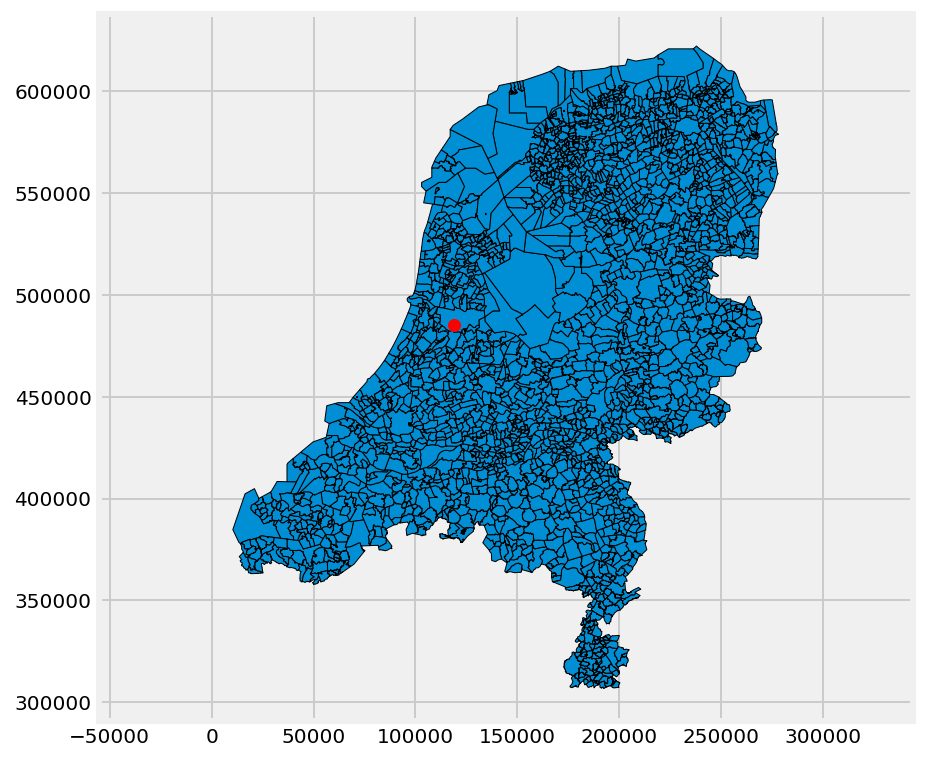

In [268]:
##### map_df.to_crs(epsg=4289).plot(edgecolor='black')
# map_df.to_crs(epsg=3857).plot(edgecolor='black')
from shapely.geometry import Point
from matplotlib import pyplot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig, ax = pyplot.subplots(figsize=(6.5, 6.5))
map_df_woonplaats.plot(edgecolor='black', ax=ax)
# map_df_woonplaats.to_crs(crs = 28992, epsg=4833).plot(figsize=(20,12), edgecolor='black')
final_crs = {'init': 'epsg:28992'}
lon=52.3545653,
lat=4.8585408
Amsterdam = Point((4.8585408,52.3545653))
AmsterdamS = gpd.GeoSeries([Amsterdam], crs={'init': 'epsg:4326'})
AmsterdamS.to_crs(final_crs).plot(ax=ax, c='r')
plt.axis('equal')

In [248]:
map_df_woonplaats.crs

{'init': 'epsg:28992'}

(3.111975323123453, 7.42347574222345, 50.60906469452001, 53.71772607664506)

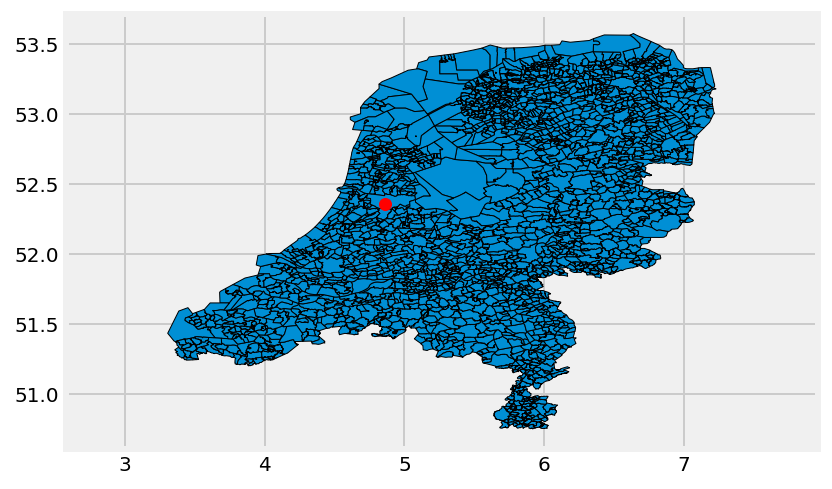

In [364]:

from shapely.geometry import Point
from matplotlib import pyplot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

final_crs = {'init': 'epsg:4326'}
data_crs={'init': 'epsg:28992'}
ax = plt.axes()
# map_df_woonplaats.plot(edgecolor='black', ax=ax)
map_df_woonplaats.to_crs(crs=final_crs).plot(figsize=(20,12), edgecolor='black', ax=ax)
# 

lon=52.3545653,
lat=4.8585408
Amsterdam = Point((4.8585408,52.3545653))
AmsterdamS = gpd.GeoSeries([Amsterdam], crs={'init': 'epsg:4326'})
AmsterdamS.to_crs(final_crs).plot(ax=ax, c='r')
plt.axis('equal')

In [238]:
AmsterdamS

0    POINT (4.8585408 52.3545653)
dtype: object

In [157]:
df_prov_caps =  pd.read_excel(shapedir+'ProvCaps.xlsx')

In [158]:
geometry = [Point(xy) for xy in zip(df_prov_caps['lon'], df_prov_caps['lat'])]

In [159]:
map_df_prov_caps = gpd.GeoDataFrame(df_prov_caps,
                                crs={'init': 'epsg:4326'},#final_crs,
                                geometry=geometry)

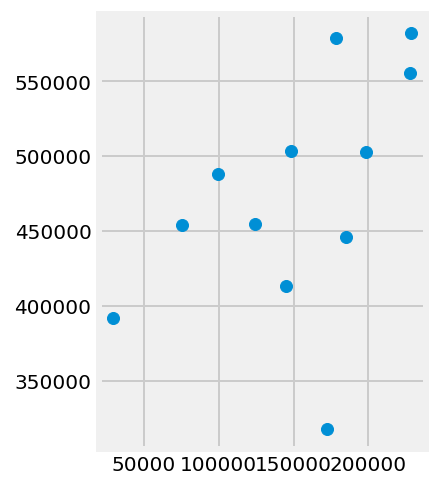

In [186]:
map_df_prov_caps.to_crs(crs=final_crs, inplace=True)
map_df_prov_caps.plot();

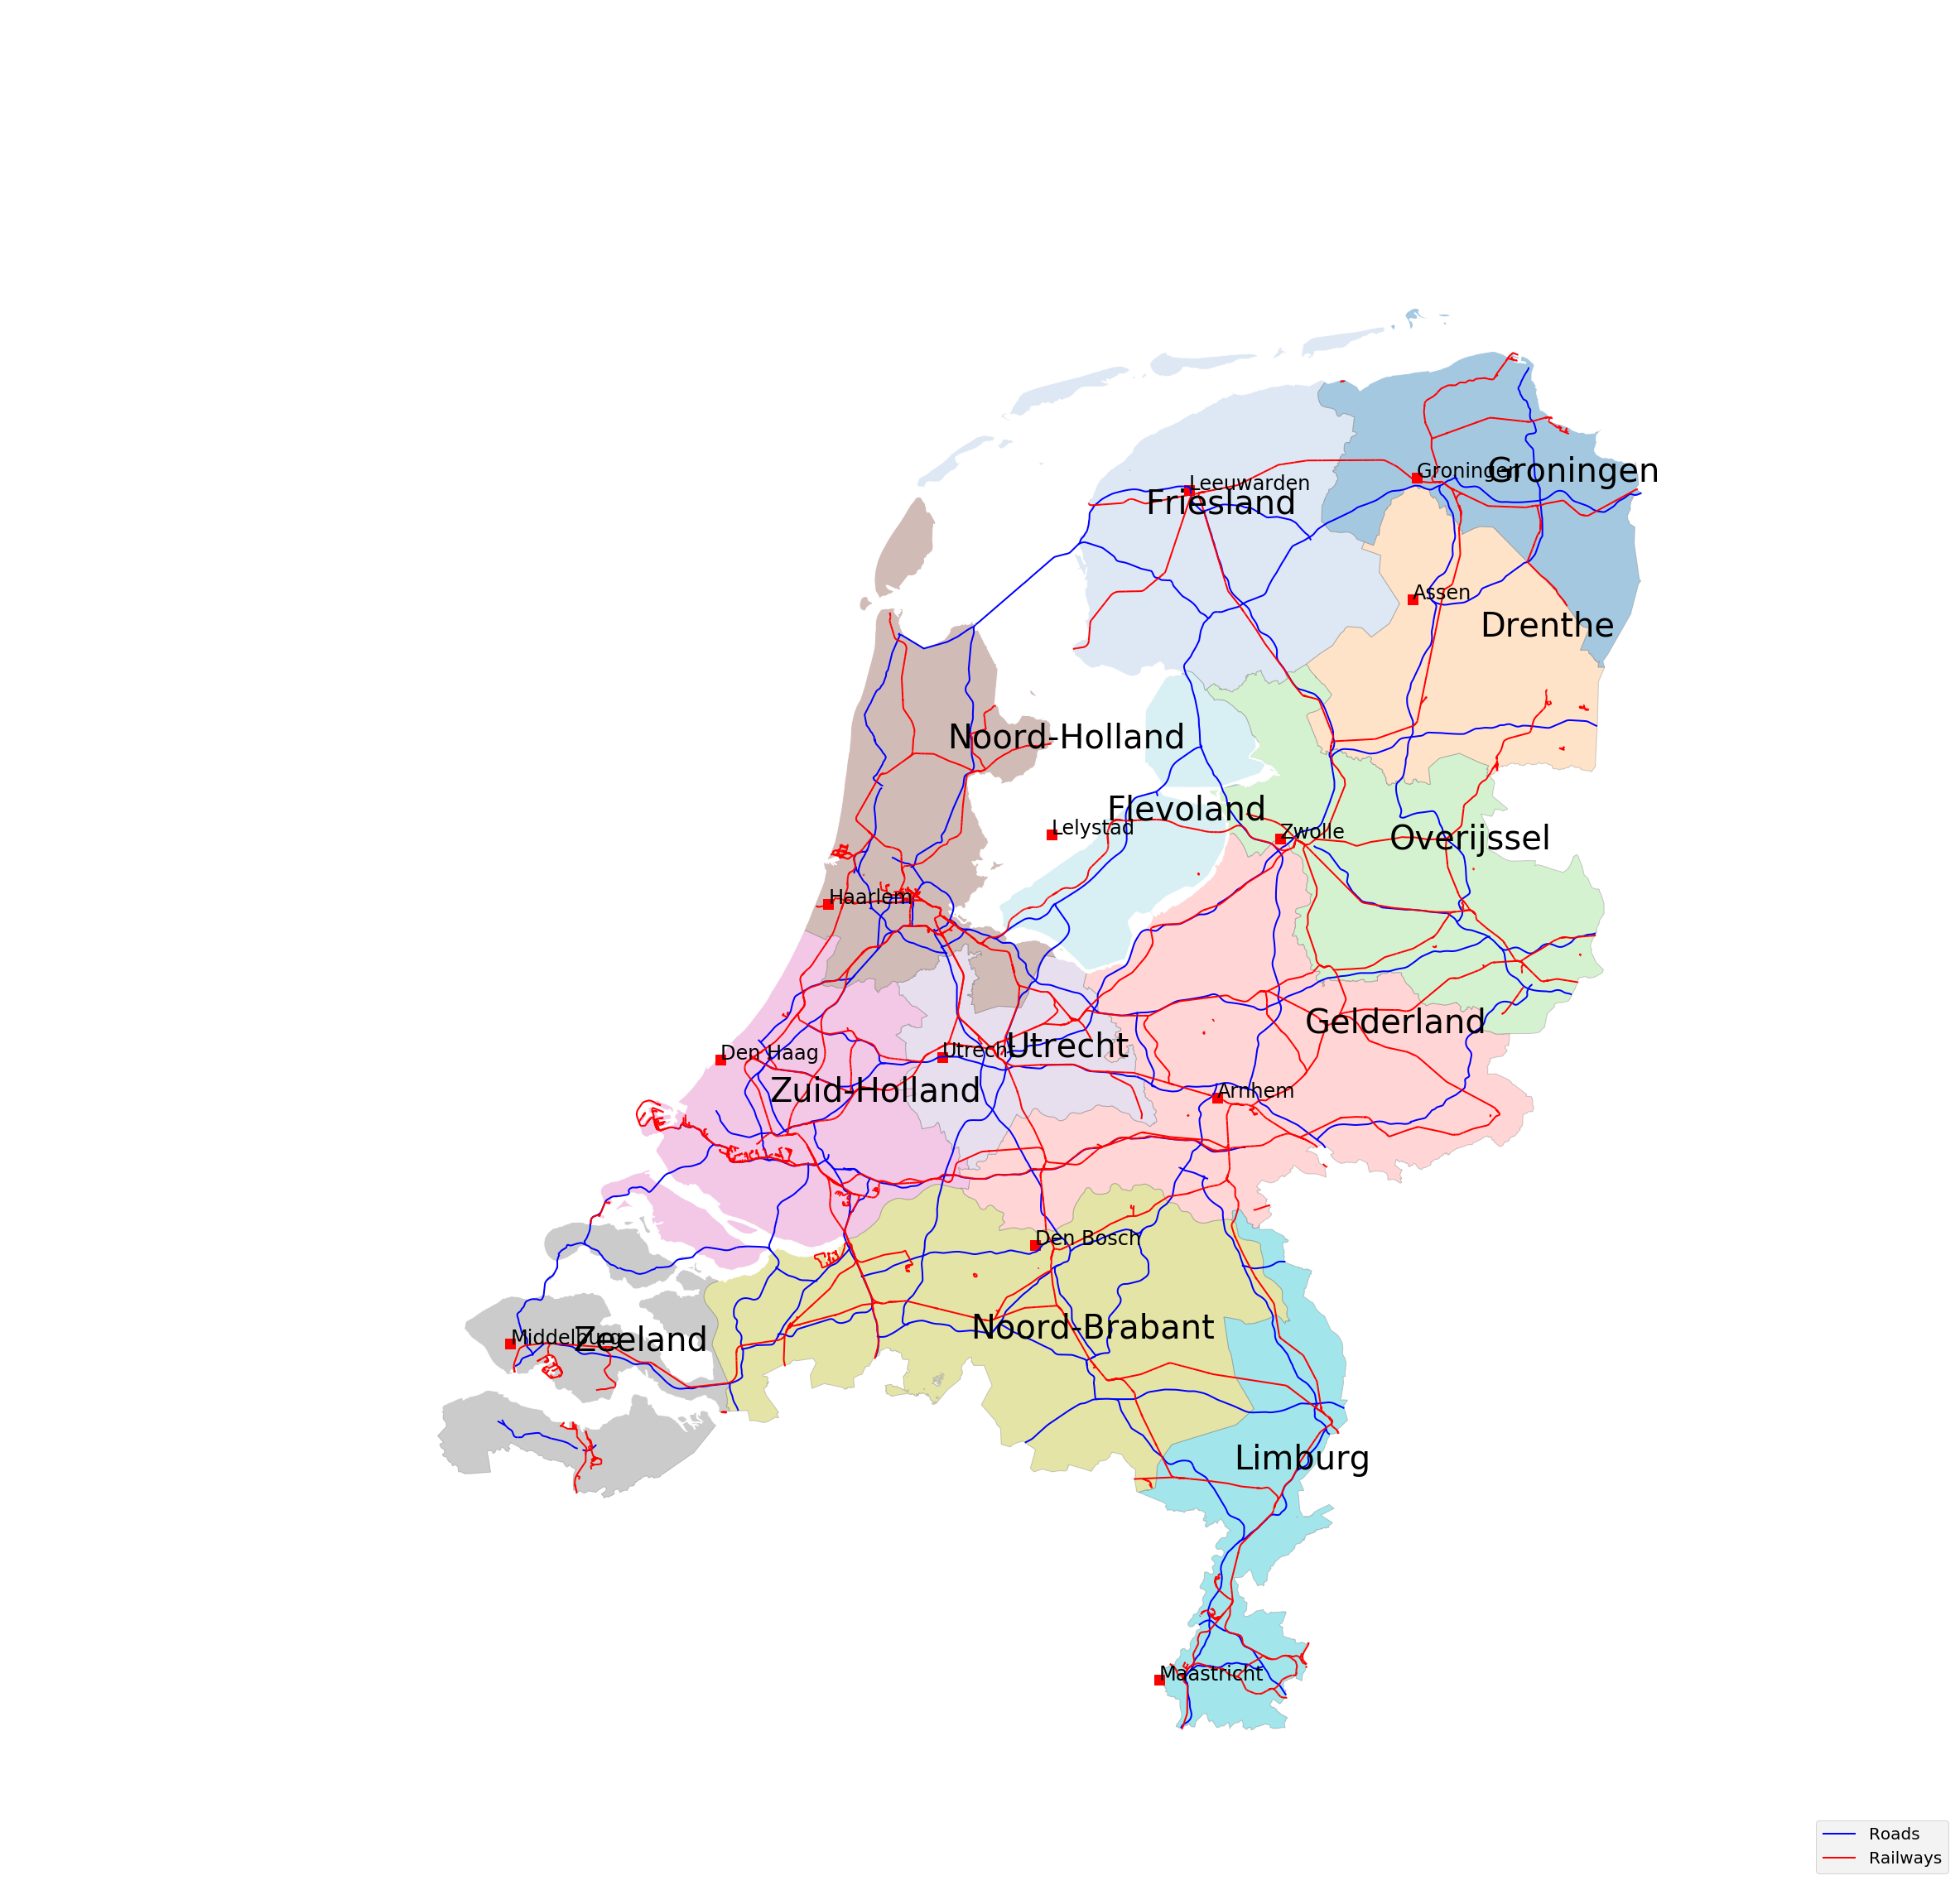

In [181]:
plt.figure(figsize=(20,20)) 
ax = plt.axes()
ax.axis('off')
map_df_provincies.plot(cmap='tab20',ax=ax, facecolor='white', edgecolor='grey', alpha=.4)
map_df_kustlijn.plot(edgecolor='white', facecolor='white',ax=ax)
map_df_roads.loc[map_df_roads['BEHEERDER']=='R'].plot(lw=1, color='blue', ax=ax, label='Roads')
map_df_rail.loc[map_df_rail['typespoorb']=='trein'].plot(lw=1, color='r',ax=ax, label='Railways')
map_df_prov_caps.to_crs(crs=final_crs).plot(ax=ax, c='r', marker='s')
for x, y, label in zip(map_df_provincies_points.geometry.x, map_df_provincies_points.geometry.y, map_df_provincies_points['provincienaam']):
    texts.append(plt.text(x, y, label, fontsize = 20, weight='medium'))
caps = []
for x, y, label in zip(map_df_prov_caps.geometry.x, map_df_prov_caps.geometry.y, map_df_prov_caps['Naam']):
    caps.append(plt.text(x, y, label, fontsize = 12))
plt.legend(bbox_to_anchor=(1.05, 0), loc=2, borderaxespad=0.5);






In [170]:
caps

[Text(4.57, 52.38, 'Haarlem'),
 Text(4.23, 52.07, 'Den Haag'),
 Text(3.58, 51.5, 'Middelburg'),
 Text(5.24, 51.71, 'Den Bosch'),
 Text(5.63, 50.85, 'Maastricht'),
 Text(5.82, 52.0, 'Arnhem'),
 Text(6.03, 52.51, 'Zwolle'),
 Text(6.47, 52.98, 'Assen'),
 Text(6.49, 53.22, 'Groningen '),
 Text(5.74, 53.2, 'Leeuwarden'),
 Text(5.29, 52.52, 'Lelystad'),
 Text(4.94, 52.08, 'Utrecht')]

In [183]:
cbs = shapedir +'CBS_PC4_2017_v1.shp'

map_df_cbs = gpd.read_file(cbs)



In [184]:
map_df_cbs.shape

(4066, 35)

In [185]:
map_df_cbs.head()

PC4  INWONER    MAN  VROUW  INW_014  INW_1524  INW_2544  INW_4564  \
0  1011     9645   4990   4655      800      1195      3195      2920   
1  1012     8240   4480   3760      465      1195      4195      1730   
2  1013    21080  10550  10525     2640      1860      7685      6115   
3  1014      645    375    270       65        45       400       115   
4  1015    14810   7545   7265     1410      1465      5235      4365   

   INW_65PL  GEBOORTE  P_AUTOCHT  P_WALLOCH  P_NWALLOCH  AANTAL_HH  \
0      1540        75         60         30          10       6380   
1       650        50         50         30          10       5960   
2      2775       280         60         20          20      12580   
3        20        15         60         20          20        330   
4      2340       125         60         30          10       9740   

   TOTHH_EENP  TOTHH_MPZK  HH_EENOUD  HH_TWEEOUD  GEM_HH_GR  WONING  \
0        4175        1305        345         500        1.5    6110   
1        4245        1175        190         260        1.4    5695   
2        7525        2430       1020        1510        1.7   12825   
3         170         105         10          45        1.7     270   
4        6340        1925        535         860        1.5    9865   

   WONVOOR45  WON_4564  WON_6574  WON_7584  WON_8594  WON_9504  WON_0514  \
0       3605       115       115       800       390       670       370   
1       4725        20        50        85       490       225       105   
2       6930        75       115      1625      1475       445      2005   
3         20         5         5         5        20       185    -99997   
4       7275       100       235       755      1075       340        80   

   WON_1524  WON_MRGEZ  G_GAS_WON  G_ELEK_WON  UITKMINAOW    OAD  STED  \
0        45       5915        900        2060         825   6907     1   
1    -99997       5380       1090        2150         480   8410     1   
2       160      12670        920        1990        2720   6224     1   
3        25        225       1000        2160          80   2645     1   
4    -99997       9385       1050        1960        1395  10975     1   

                                            geometry  
0  POLYGON ((122246.2320000008 487910.1770000011,...  
1  POLYGON ((121995.0291999988 488243.2021000013,...  
2  (POLYGON ((120506.2192000002 489494.5513000004...  
3  (POLYGON ((120390.1125999987 489860.7457000017...  
4  POLYGON ((120665.6422999986 488535.5, 120668.7...

No handles with labels found to put in legend.


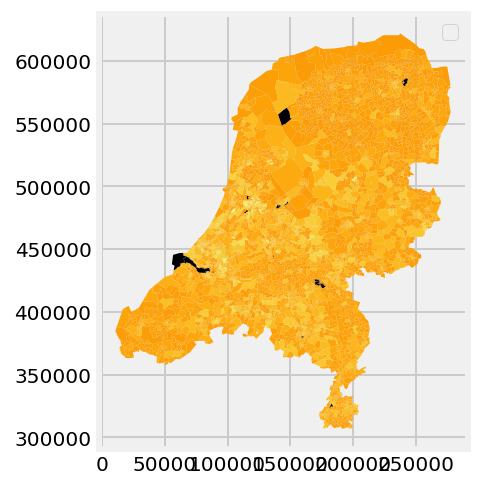

In [193]:
map_df_cbs.plot(column='INWONER', cmap='inferno', label=map_df_cbs['INWONER'])
plt.legend()

No handles with labels found to put in legend.


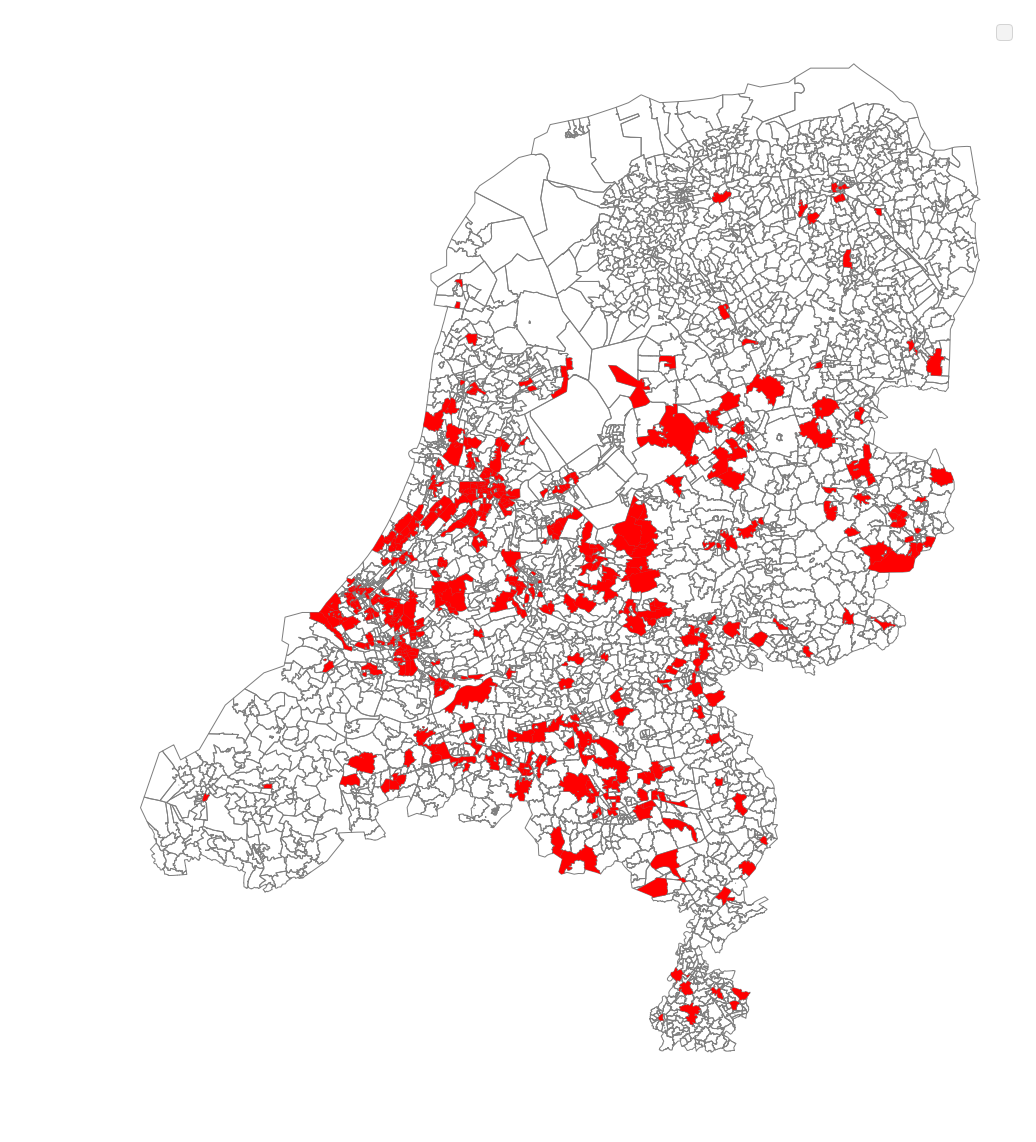

In [208]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.axis('off')
map_df_pc4.plot(ax=ax, alpha=1, edgecolor='grey', facecolor='None')
map_df_cbs.loc[map_df_cbs['INWONER'].astype(int)> 10000].plot(ax=ax, facecolor='r', 
                                                              label='pop. > 10000')
plt.legend();

In [210]:
map_df_combined = pd.merge(map_df_pc4, map_df_cbs, left_on=map_df_pc4['PC4'], right_on=map_df_cbs['PC4'].astype(str))

In [211]:
map_df_combined.head()

key_0  OBJECTID PC4_x  Aantal_mul  Aantal_adr    Shape_Leng    Shape_Area  \
0  1011       1.0  1011           1        7466   5908.190943  1.034025e+06   
1  1012       2.0  1012           1        9261   5489.203939  1.214502e+06   
2  1013       3.0  1013           2       15159  19421.006995  5.075544e+06   
3  1014       4.0  1014           4        1640  15355.645043  2.674418e+06   
4  1015       5.0  1015           1       11274   4732.836386  7.704063e+05   

                                          geometry_x  PC4_y  INWONER    MAN  \
0  POLYGON ((122246.2320000008 487910.1770000011,...   1011     9645   4990   
1  POLYGON ((121995.0291999988 488243.2021000013,...   1012     8240   4480   
2  (POLYGON ((120506.2192000002 489494.5513000004...   1013    21080  10550   
3  (POLYGON ((120390.1125999987 489860.7457000017...   1014      645    375   
4  POLYGON ((120665.6422999986 488535.5, 120668.7...   1015    14810   7545   

   VROUW  INW_014  INW_1524  INW_2544  INW_4564  INW_65PL  GEBOORTE  \
0   4655      800      1195      3195      2920      1540        75   
1   3760      465      1195      4195      1730       650        50   
2  10525     2640      1860      7685      6115      2775       280   
3    270       65        45       400       115        20        15   
4   7265     1410      1465      5235      4365      2340       125   

   P_AUTOCHT  P_WALLOCH  P_NWALLOCH  AANTAL_HH  TOTHH_EENP  TOTHH_MPZK  \
0         60         30          10       6380        4175        1305   
1         50         30          10       5960        4245        1175   
2         60         20          20      12580        7525        2430   
3         60         20          20        330         170         105   
4         60         30          10       9740        6340        1925   

   HH_EENOUD  HH_TWEEOUD  GEM_HH_GR  WONING  WONVOOR45  WON_4564  WON_6574  \
0        345         500        1.5    6110       3605       115       115   
1        190         260        1.4    5695       4725        20        50   
2       1020        1510        1.7   12825       6930        75       115   
3         10          45        1.7     270         20         5         5   
4        535         860        1.5    9865       7275       100       235   

   WON_7584  WON_8594  WON_9504  WON_0514  WON_1524  WON_MRGEZ  G_GAS_WON  \
0       800       390       670       370        45       5915        900   
1        85       490       225       105    -99997       5380       1090   
2      1625      1475       445      2005       160      12670        920   
3         5        20       185    -99997        25        225       1000   
4       755      1075       340        80    -99997       9385       1050   

   G_ELEK_WON  UITKMINAOW    OAD  STED  \
0        2060         825   6907     1   
1        2150         480   8410     1   
2        1990        2720   6224     1   
3        2160          80   2645     1   
4        1960        1395  10975     1   

                                          geometry_y  
0  POLYGON ((122246.2320000008 487910.1770000011,...  
1  POLYGON ((121995.0291999988 488243.2021000013,...  
2  (POLYGON ((120506.2192000002 489494.5513000004...  
3  (POLYGON ((120390.1125999987 489860.7457000017...  
4  POLYGON ((120665.6422999986 488535.5, 120668.7...

In [213]:
gemeenten = shapedir+'2019_gemeentegrenzen_kustlijn.gpkg'





map_df_gemeenten = gpd.read_file(gemeenten)


In [214]:
map_df_gemeenten.head()

id  gid  code   gemeentenaam  \
0   2   14  1719      Drimmelen   
1   3   15  0614     Westvoorne   
2   4   16  0279   Scherpenzeel   
3   5   17  1729  Gulpen-Wittem   
4   6   18  0160     Hardenberg   

                                            geometry  
0  (POLYGON ((107416.617 415030.81, 107671.011 41...  
1  (POLYGON ((62182.934 438381.125, 62209.308 438...  
2  (POLYGON ((161629.436 456087.238, 161634.058 4...  
3  (POLYGON ((188277.343 315958.217, 188275.109 3...  
4  (POLYGON ((235753.945 520891.056, 235788.817 5...

In [215]:
map_df_gemeenten.dtypes

id               int64
gid              int64
code            object
gemeentenaam    object
geometry        object
dtype: object

In [216]:
df_gem_post=pd.read_csv(shapedir+'pc6hnr20170801_gwb.csv', sep=';')


In [217]:
df_gem_post.head()

PC6  Huisnummer  Buurt2017  Wijk2017  Gem2017
0  1011AB         105    3630400     36304      363
1  1011AB         106    3630400     36304      363
2  1011AB         107    3630400     36304      363
3  1011AB         110    3630400     36304      363
4  1011AB         112    3630400     36304      363

In [218]:
df_gem_post['PC4'] = df_gem_post['PC6'].str[:4]

In [219]:
df_gem_post['temp'] = df_gem_post['PC4'] + df_gem_post['Gem2017'].astype(str)

In [220]:
df_gem_post_uniques = df_gem_post.drop_duplicates(subset='temp')
df_gem_post_uniques = df_gem_post_uniques[['Gem2017','PC4']]

In [221]:
df_gem_post_uniques.sample(5)

Gem2017   PC4
3161043      344  3565
3726166     1676  4311
4450111      796  5235
7316079     1680  9447
6045487     1859  7151

In [222]:
df_gem_post_uniques['Gem2017'] = df_gem_post_uniques['Gem2017'].astype(str).str.zfill(4)

In [223]:
df_gem_post_uniques.sample(5)

Gem2017   PC4
7527086    0053  9774
7403820    1680  9656
2562931    0606  3113
2056475    0637  2717
2371771    0599  3037

In [224]:
df_gem_post_combined = pd.merge(map_df_gemeenten, df_gem_post_uniques, left_on=map_df_gemeenten['code'], right_on=df_gem_post_uniques['Gem2017'])

In [225]:
df_gem_post_combined.isnull().count()

key_0           3708
id              3708
gid             3708
code            3708
gemeentenaam    3708
geometry        3708
Gem2017         3708
PC4             3708
dtype: int64

In [226]:
map_df_combined_= pd.merge(map_df_combined, df_gem_post_combined, left_on=map_df_combined['PC4_x'], right_on=df_gem_post_combined['PC4'].astype(str))

In [227]:
df_gem_post_combined.columns

Index(['key_0', 'id', 'gid', 'code', 'gemeentenaam', 'geometry', 'Gem2017',
       'PC4'],
      dtype='object')

In [228]:
type(map_df_combined_)

geopandas.geodataframe.GeoDataFrame

In [234]:
map_df_combined_= map_df_combined_[[ 'Gem2017', 'PC4', 'id', 'gid',
       'gemeentenaam', 'geometry', 'OBJECTID', 'PC4_x',
       'Aantal_mul', 'Aantal_adr', 'Shape_Leng', 'Shape_Area',
        'INWONER', 'MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544',
       'INW_4564', 'INW_65PL', 'GEBOORTE', 'P_AUTOCHT', 'P_WALLOCH',
       'P_NWALLOCH', 'AANTAL_HH', 'TOTHH_EENP', 'TOTHH_MPZK', 'HH_EENOUD',
       'HH_TWEEOUD', 'GEM_HH_GR', 'WONING', 'WONVOOR45', 'WON_4564',
       'WON_6574', 'WON_7584', 'WON_8594', 'WON_9504', 'WON_0514', 'WON_1524',
       'WON_MRGEZ', 'G_GAS_WON', 'G_ELEK_WON', 'UITKMINAOW', 'OAD', 'STED']]

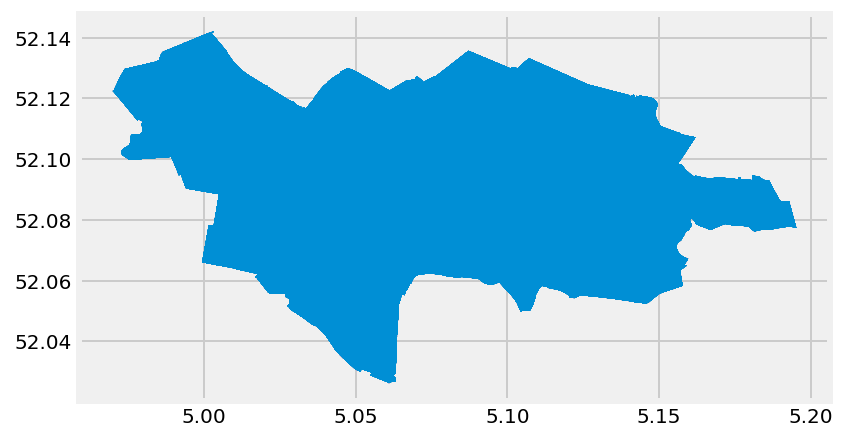

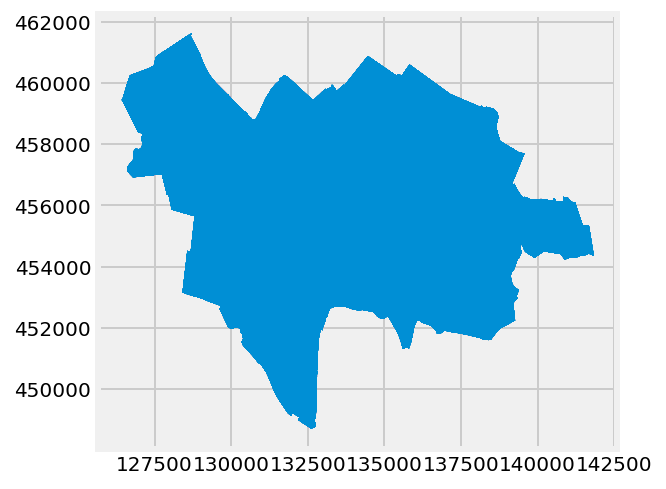

In [230]:
map_df_combined_.to_crs(epsg= 4326).loc[map_df_combined_['gemeentenaam']== 'Utrecht'].plot()
map_df_combined_.loc[map_df_combined_['gemeentenaam']== 'Utrecht'].plot()

In [231]:
grouped = map_df_combined_.groupby('Gem2017')

In [232]:
grouped_pop = grouped[['gemeentenaam','INWONER']]

In [357]:
p1 = Point(map_df_provincies_points.geometry.x[3], map_df_provincies_points.geometry.y[3])
p2 = Point(map_df_provincies_points.geometry.x[10], map_df_provincies_points.geometry.y[10])
# Point(0,0).distance(Point(1,1))
print(map_df_provincies_points.iloc[:,3:4])
p1.distance(p2)

    provincienaam
0       Groningen
1       Friesland
2         Drenthe
3      Overijssel
4      Gelderland
5         Utrecht
6   Noord-Holland
7    Zuid-Holland
8         Zeeland
9   Noord-Brabant
10        Limburg
11      Flevoland


140526.3964929329

In [233]:
grouped_pop.agg(sum)

INWONER
Gem2017         
0003       11975
0010       24940
0014        1956
0024       10115
0034     -199068
0037       32220
0047       27530
0050      -77542
0059       27885
0060        3630
0072       15860
0074       50670
0080      108640
0085       25535
0086       35855
0088         940
0090       55685
0093        4855
0096        1085
0098       25590
0106       67540
0109       35285
0114      107485
0118       55300
0119       33025
0141       72475
0147       22795
0148       28070
0150       99285
0153      158135
...          ...
1742       37980
1771       41180
1773       17955
1774       26245
1783      105600
1842       19035
1859       44240
1876       36410
1883       93095
1884       26365
1891       18945
1892       41475
1894       44175
1895       38095
1896       22315
1900      -15857
1901       42895
1903       25300
1904       64445
1911       47585
1916       74600
1924       48650
1926       52660
1930       85400
1931       55210
1940       51570
1942       56925
1945       34755
1948       79855
1955       35320

[343 rows x 1 columns]

In [145]:
map_df_natural=gpd.read_file(shapedir+'natural.shp')


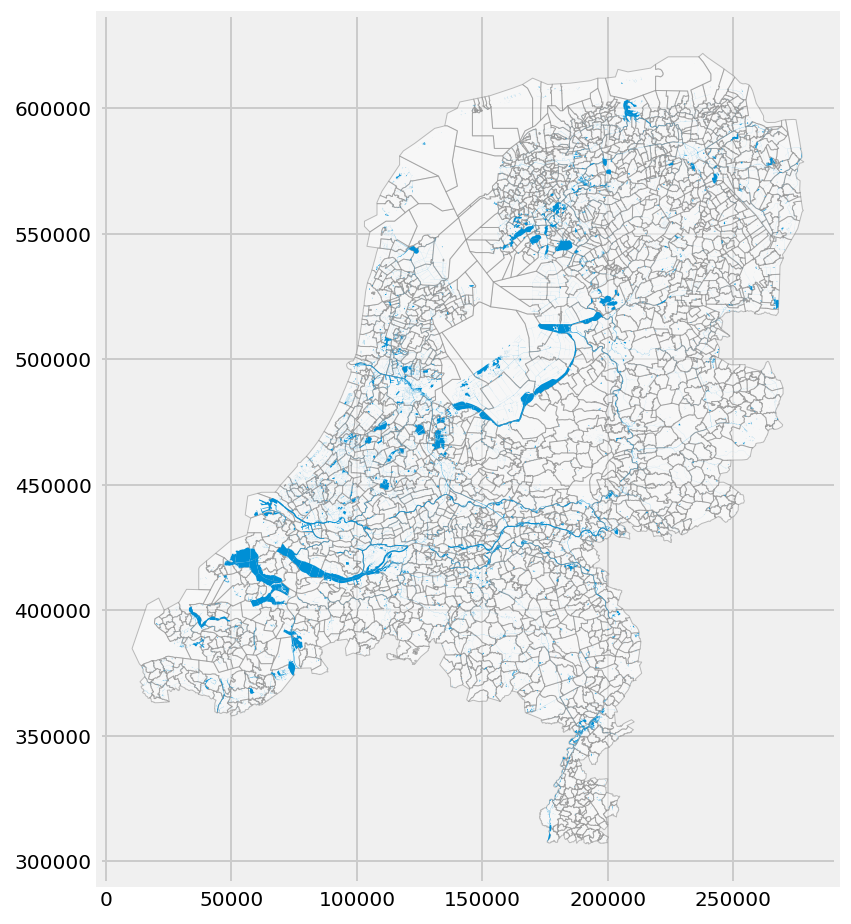

In [160]:
fig, ax = plt.subplots(1,figsize=(8,8))
map_df.plot(ax=ax, facecolor='white', edgecolor='grey', alpha=.5)
map_df_natural.to_crs(epsg= 28992).loc[map_df_natural['type']=='water'].plot(ax=ax)

In [155]:
map_df_natural.crs

{'init': 'epsg:4326'}

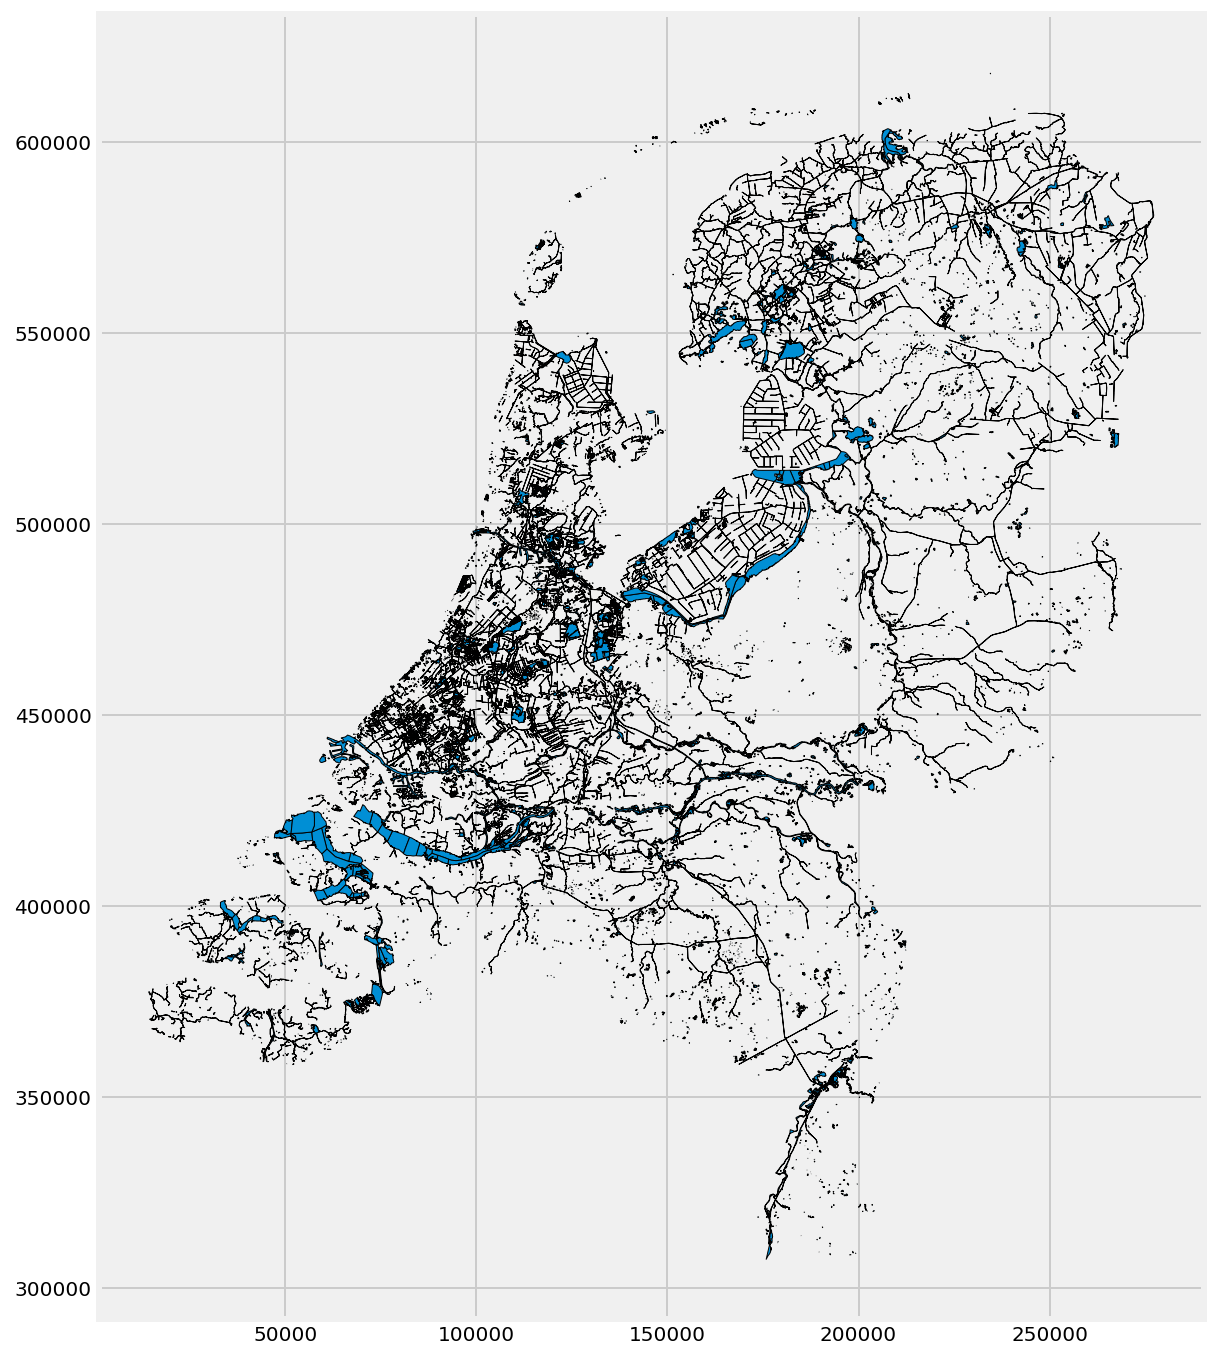

In [162]:
map_df_natural.to_crs(epsg= 28992).loc[map_df_natural['type']=='water'].plot(figsize=(20,12), edgecolor='black')